In [44]:
# 数据探索与可视化
# 实验目标
# 学习并掌握如何使用Python进行数据探索与可视化。
# 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
# 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
# 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。
# 实验要求
# 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
# 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。
import pandas as pd
import numpy as np

# 读取数据集
df = pd.read_csv('github_bot_processed_data.csv')

# 探索pandas的显示选项，以便查看更多数据行和列。
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

# 查看数据的前几行
print(df.head())

# 查看每列的数据类型
print(df.info())

# 使用describe()方法生成数据的描述性统计信息
print(df.describe())

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

In [46]:
# 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
# 将日期列转换为日期时间格式，并处理无效日期
# 使用coerce将无效日期转换为NaT
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')

# 填充缺失值
# 将NaN和空字符串都视为缺失值并填充
df['bio'] = df['bio'].fillna('No Bio')

# 打印转换后的数据
print("\n日期格式化后的数据前5行：")
print(df.head())

# 展示不同格式的效果
# 打印出日期时间列的dtype来确认它们已经被转换为datetime64类型
print("\n'created_at' 列的dtype：", df['created_at'].dtype)
print("'updated_at' 列的dtype：", df['updated_at'].dtype)

# 打印出填充后的'bio'列来查看效果
print("\n'bio' 列填充后的前5行：")
print(df['bio'].head())


日期格式化后的数据前5行：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                             No Bio            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                             No Bio            49   
4                                             No Bio            11   

   public_gists  followers  following                created_at  \
0             1          5          1 2011-09-26 17:27:03+00:00   
1             3          9       

变换前:
   public_repos  public_gists  followers  following
0            26             1          5          1
1            30             3          9          6
2           103            49       1212        221
3            49             0         84          2
4            11             1          6          2

变换后:
   log_public_repos  log_public_gists  log_followers  log_following
0          3.295837          0.693147       1.791759       0.693147
1          3.433987          1.386294       2.302585       1.945910
2          4.644391          3.912023       7.100852       5.402677
3          3.912023          0.000000       4.442651       1.098612
4          2.484907          0.693147       1.945910       1.098612


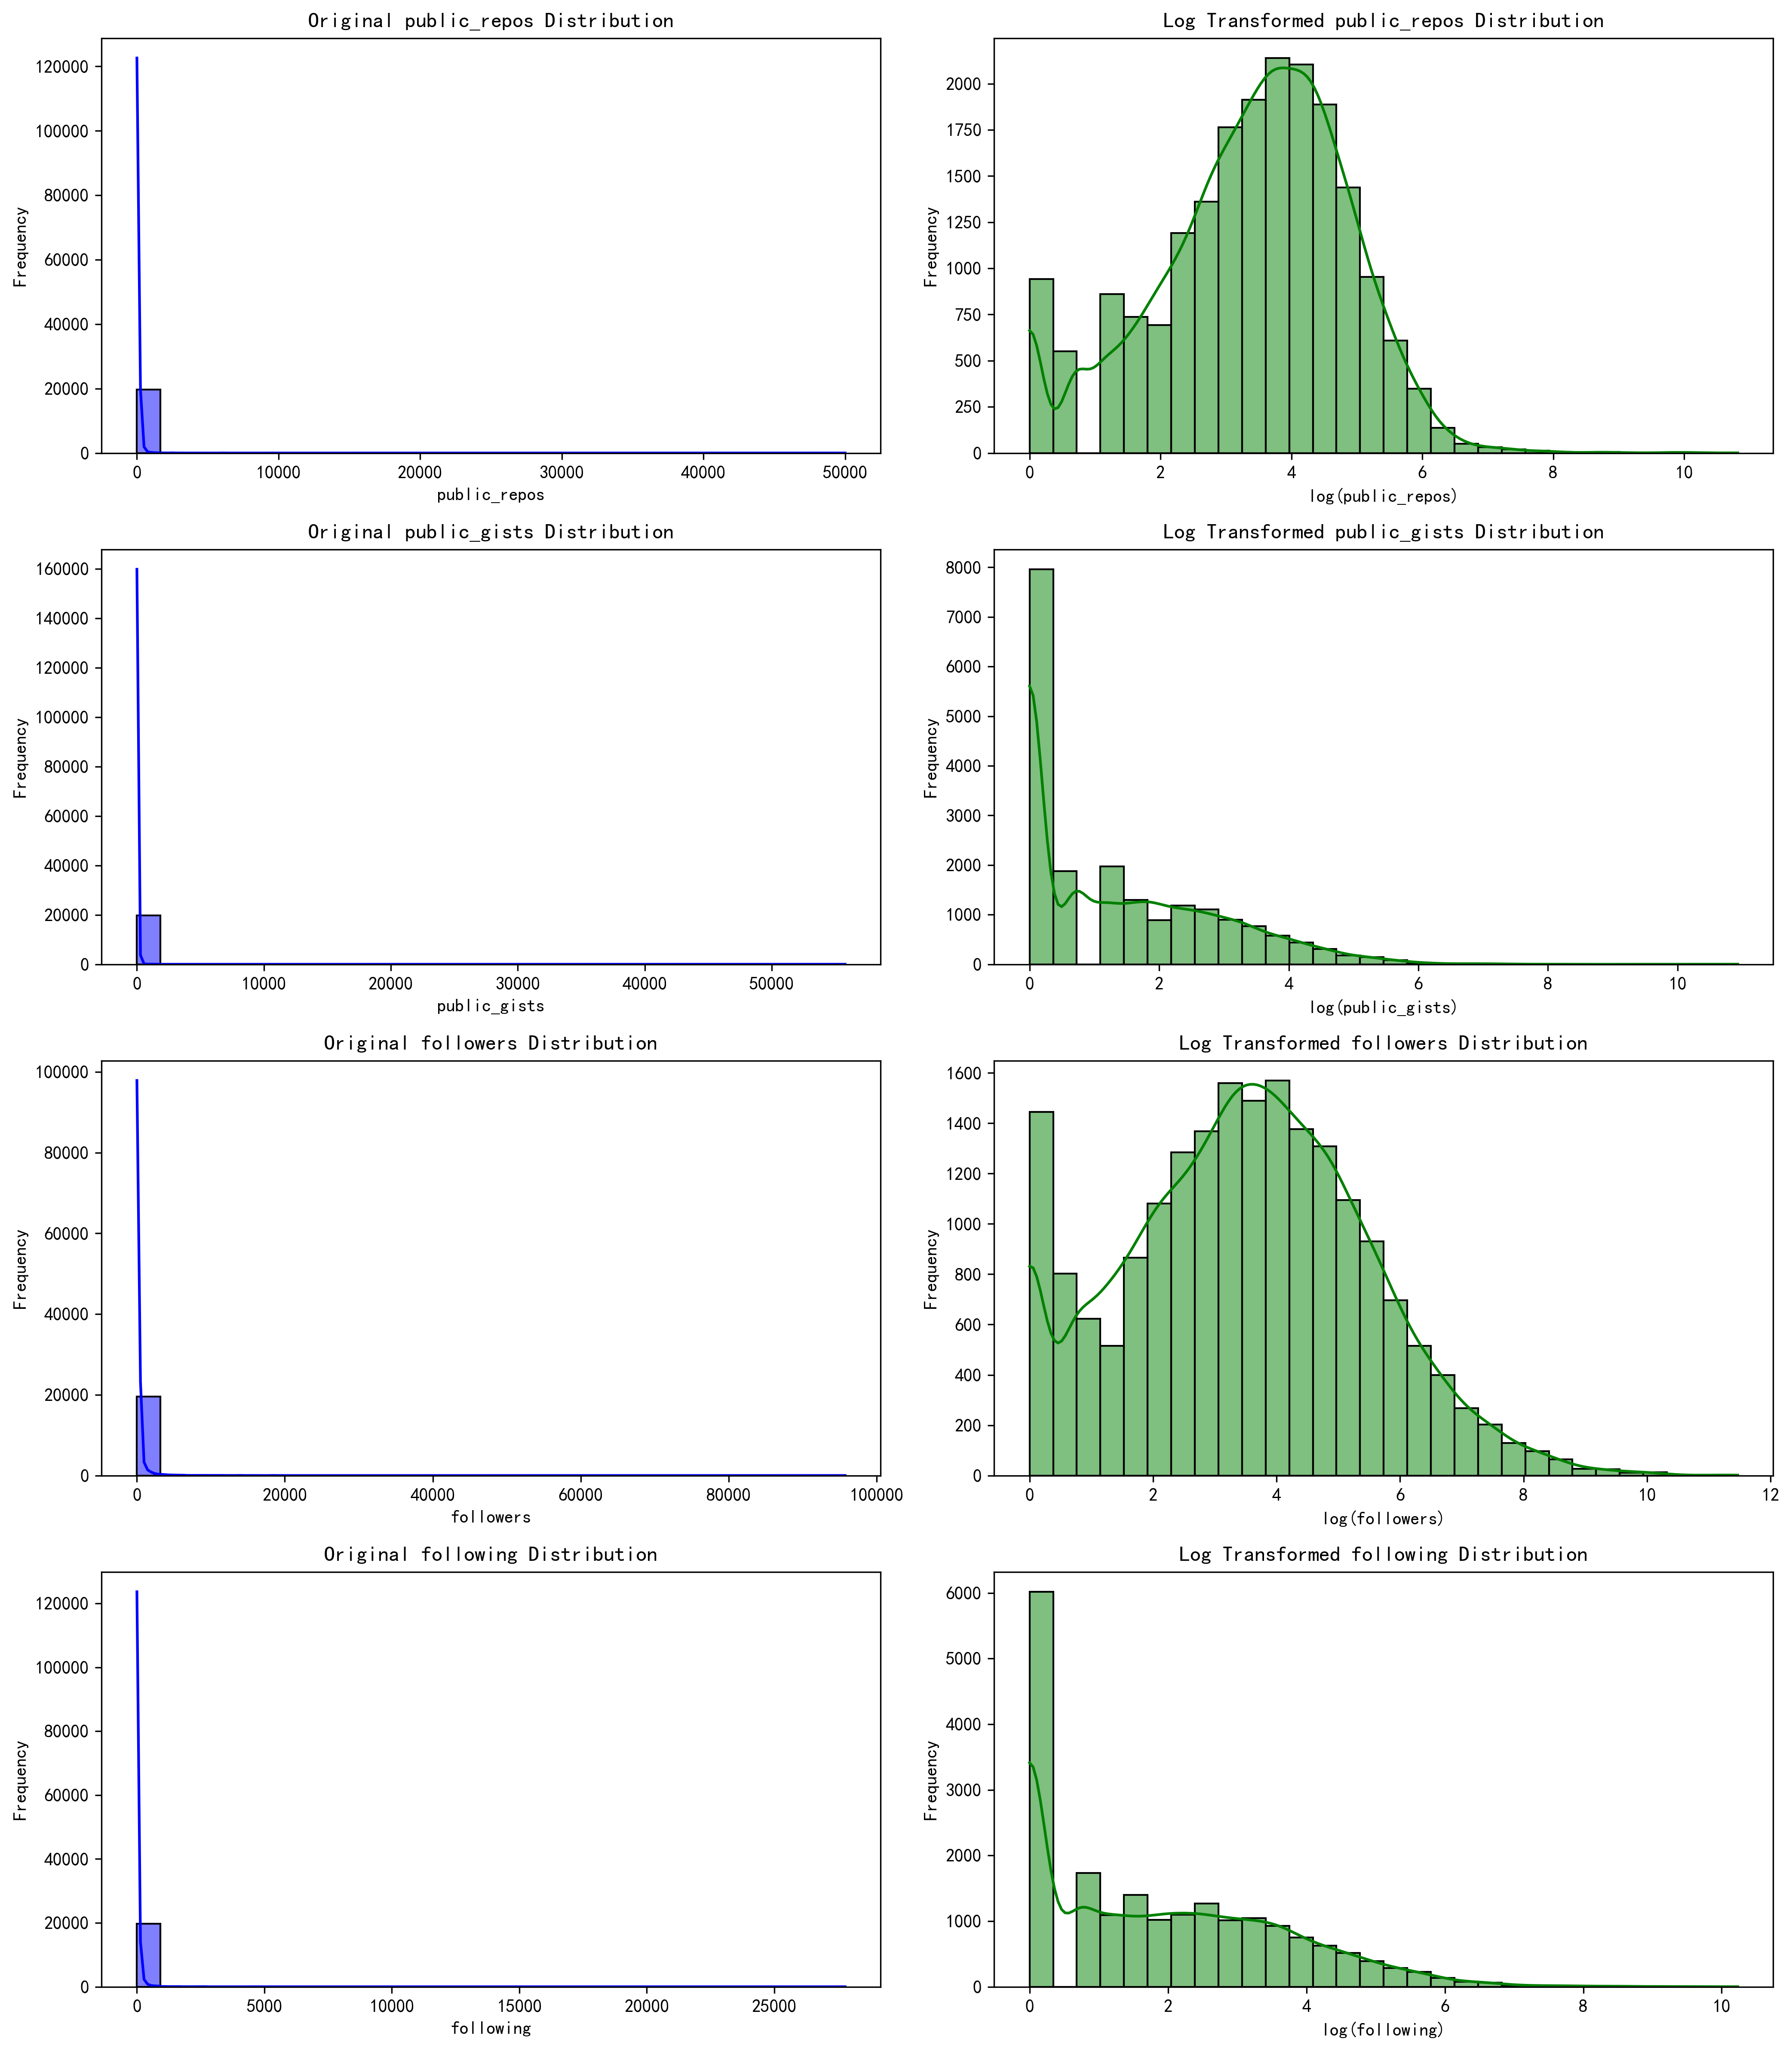

In [47]:
# 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 打印变换前的数据
print("变换前:")
print(df[['public_repos', 'public_gists', 'followers', 'following']].head())

# 对指定的列进行对数变换
log_columns = ['public_repos', 'public_gists', 'followers', 'following']
for column in log_columns:
    df[f'log_{column}'] = np.log1p(df[column])

# 打印变换后的数据
print("\n变换后:")
print(df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].head())

# 查看变换前后的数据分布
def plot_distributions(df, columns, log_columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(14, len(columns) * 4))
    for i, column in enumerate(columns):
        sns.histplot(df[column], ax=axes[i, 0], kde=True, bins=30, color='blue')
        axes[i, 0].set_title(f'Original {column} Distribution')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Frequency')
        
        sns.histplot(df[f'log_{column}'], ax=axes[i, 1], kde=True, bins=30, color='green')
        axes[i, 1].set_title(f'Log Transformed {column} Distribution')
        axes[i, 1].set_xlabel(f'log({column})')
        axes[i, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# 绘制变换前后的分布图
plot_distributions(df, log_columns, log_columns)

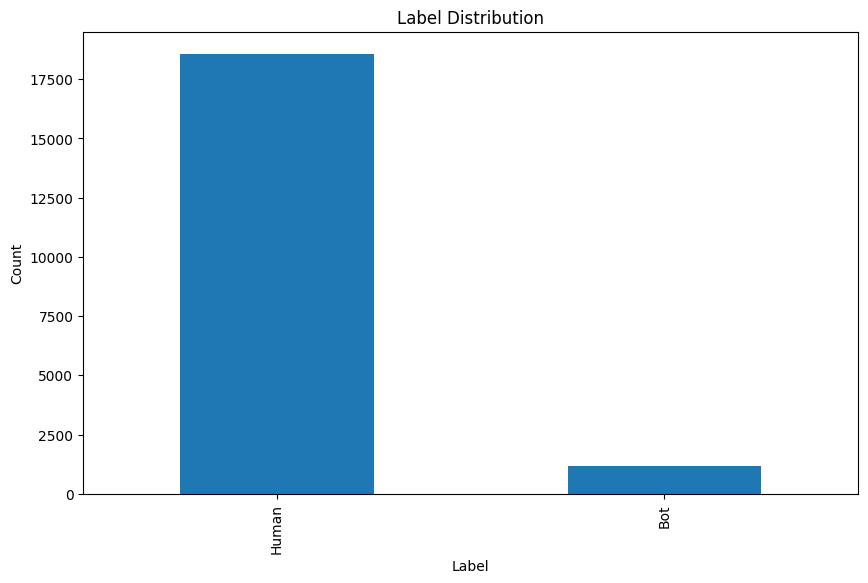

In [11]:
# 绘制条形图：展示label列的类别分布
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

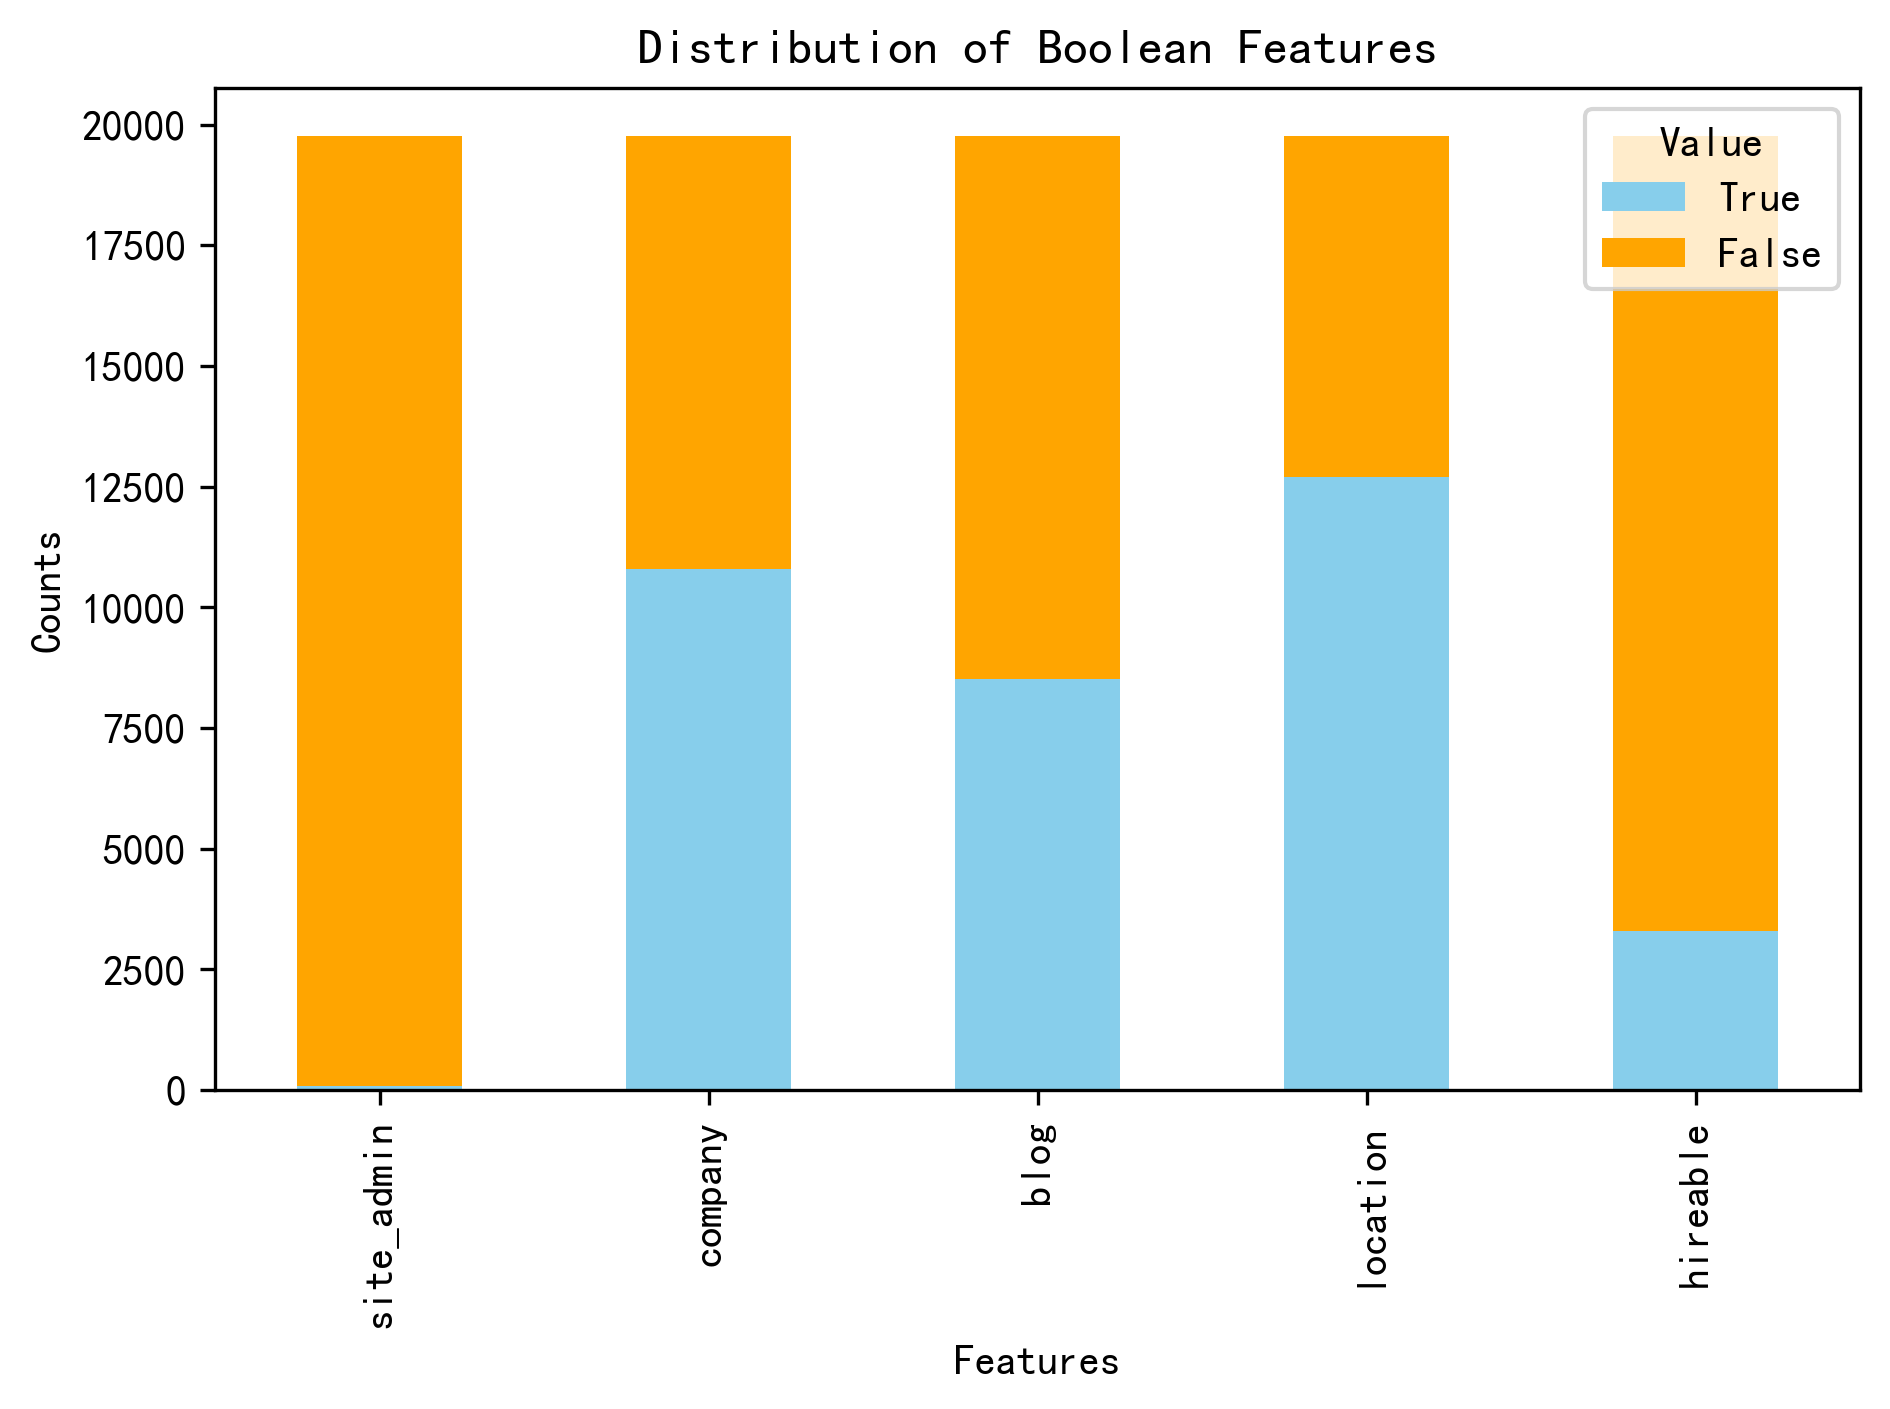

In [49]:
# 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
import pandas as pd
import matplotlib.pyplot as plt

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像时负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# 读取CSV文件
csv_file = 'github_bot_processed_data.csv'
df = pd.read_csv(csv_file)

# 筛选出想要的布尔特征列
bool_features = ['site_admin', 'company', 'blog', 'location', 'hireable']
bool_df = df[bool_features]

# 计算每个特征为True的数量
true_counts = bool_df.sum()

# 计算总的样本数量
total_samples = len(bool_df)

# 计算每个特征为False的数量
false_counts = total_samples - true_counts

# 合并True和False的计数到一个DataFrame中
counts_df = pd.DataFrame({'True': true_counts, 'False': false_counts})

# 设置特征名称为索引
counts_df.index.name = 'Features'

# 绘制堆积柱状图
counts_df.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# 添加标题和标签
plt.title('Distribution of Boolean Features')
plt.xlabel('Features')
plt.ylabel('Counts')

# 显示图例
plt.legend(title='Value')

# 显示图表
plt.tight_layout()
plt.show()

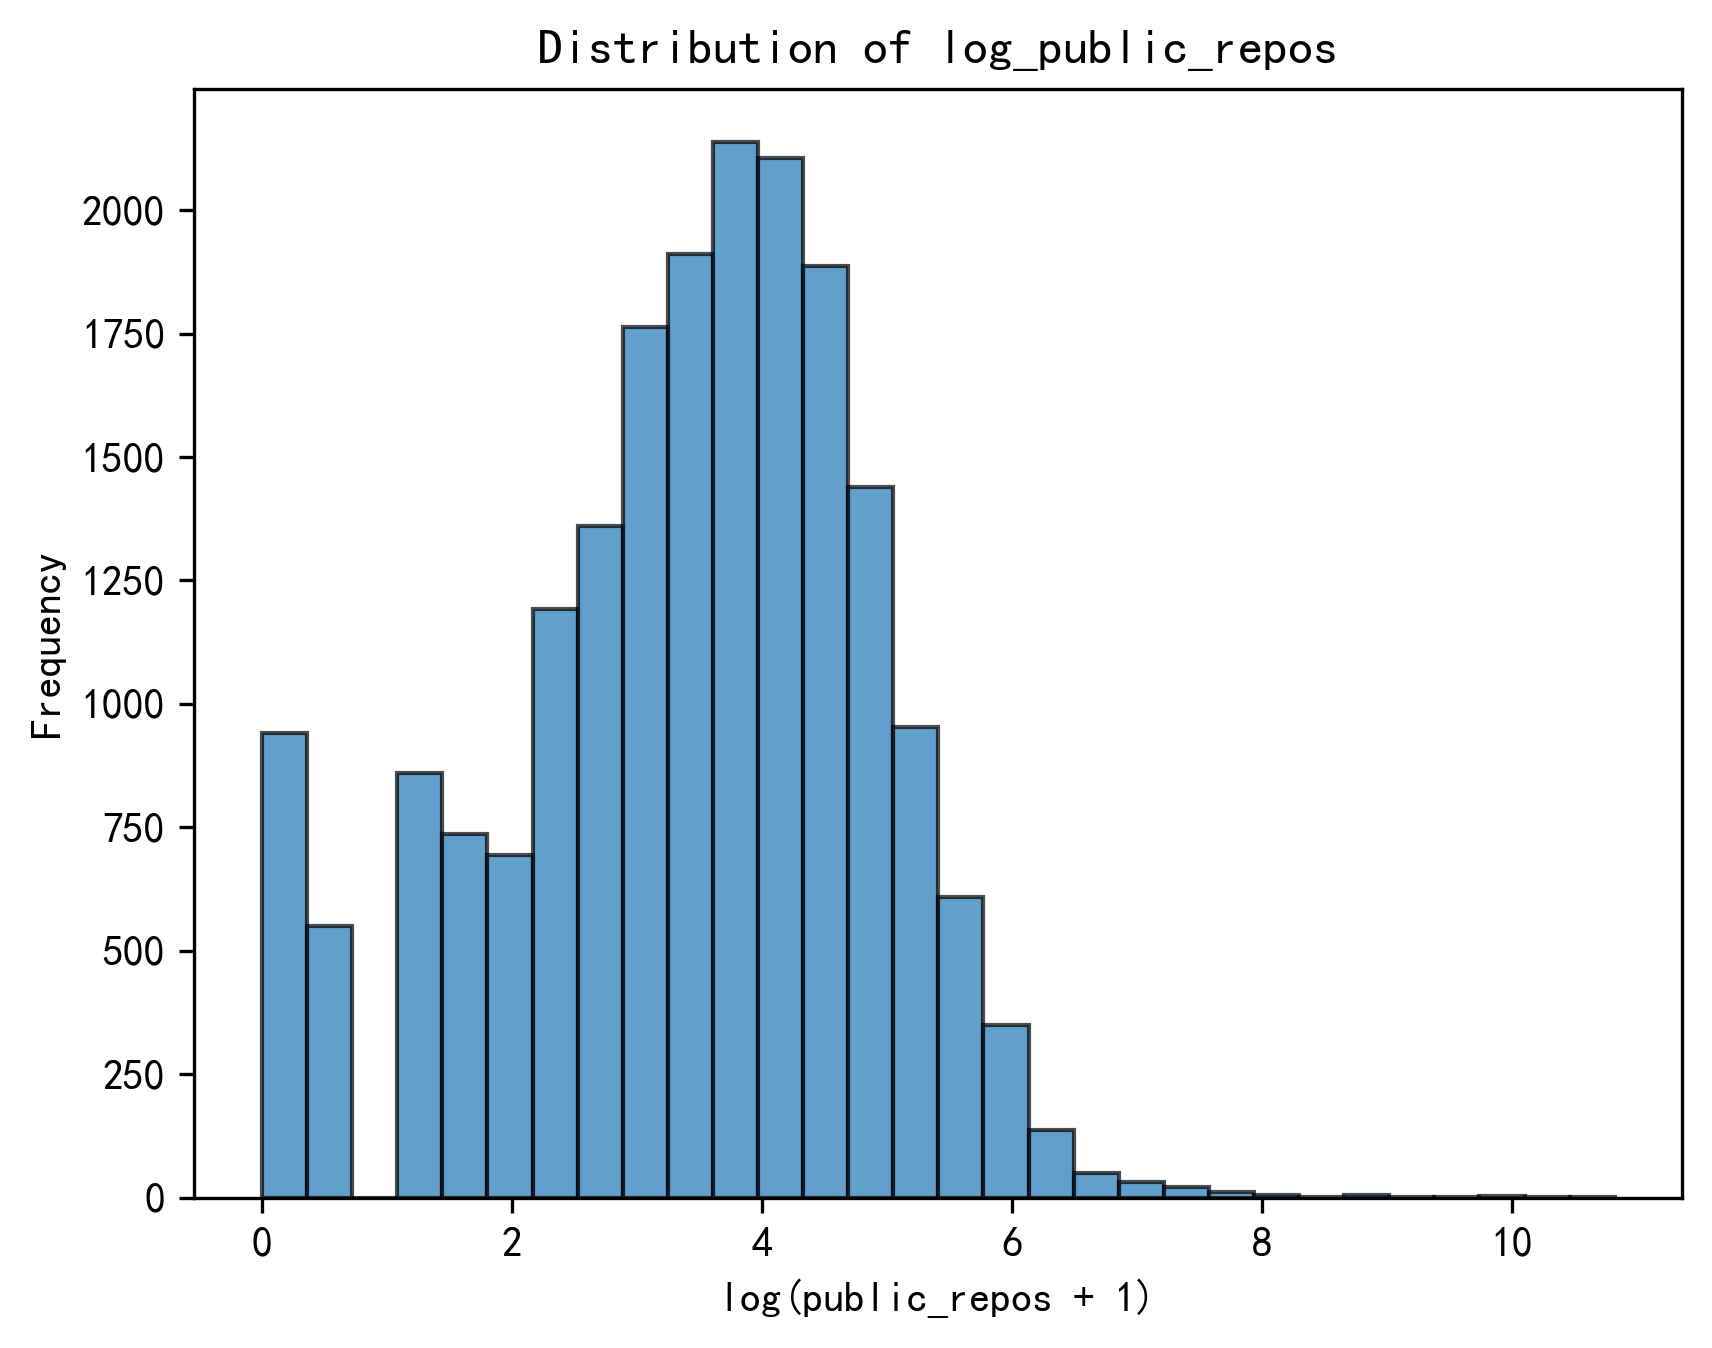

In [29]:
# 绘制直方图：展示log_public_repos的对数变换后的数据分布。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df['log_public_repos'], bins=30, edgecolor='black', alpha=0.7)

# 设置图表标题和轴标签
plt.title('Distribution of log_public_repos')
plt.xlabel('log(public_repos + 1)')
plt.ylabel('Frequency')

# 显示图表
plt.show()

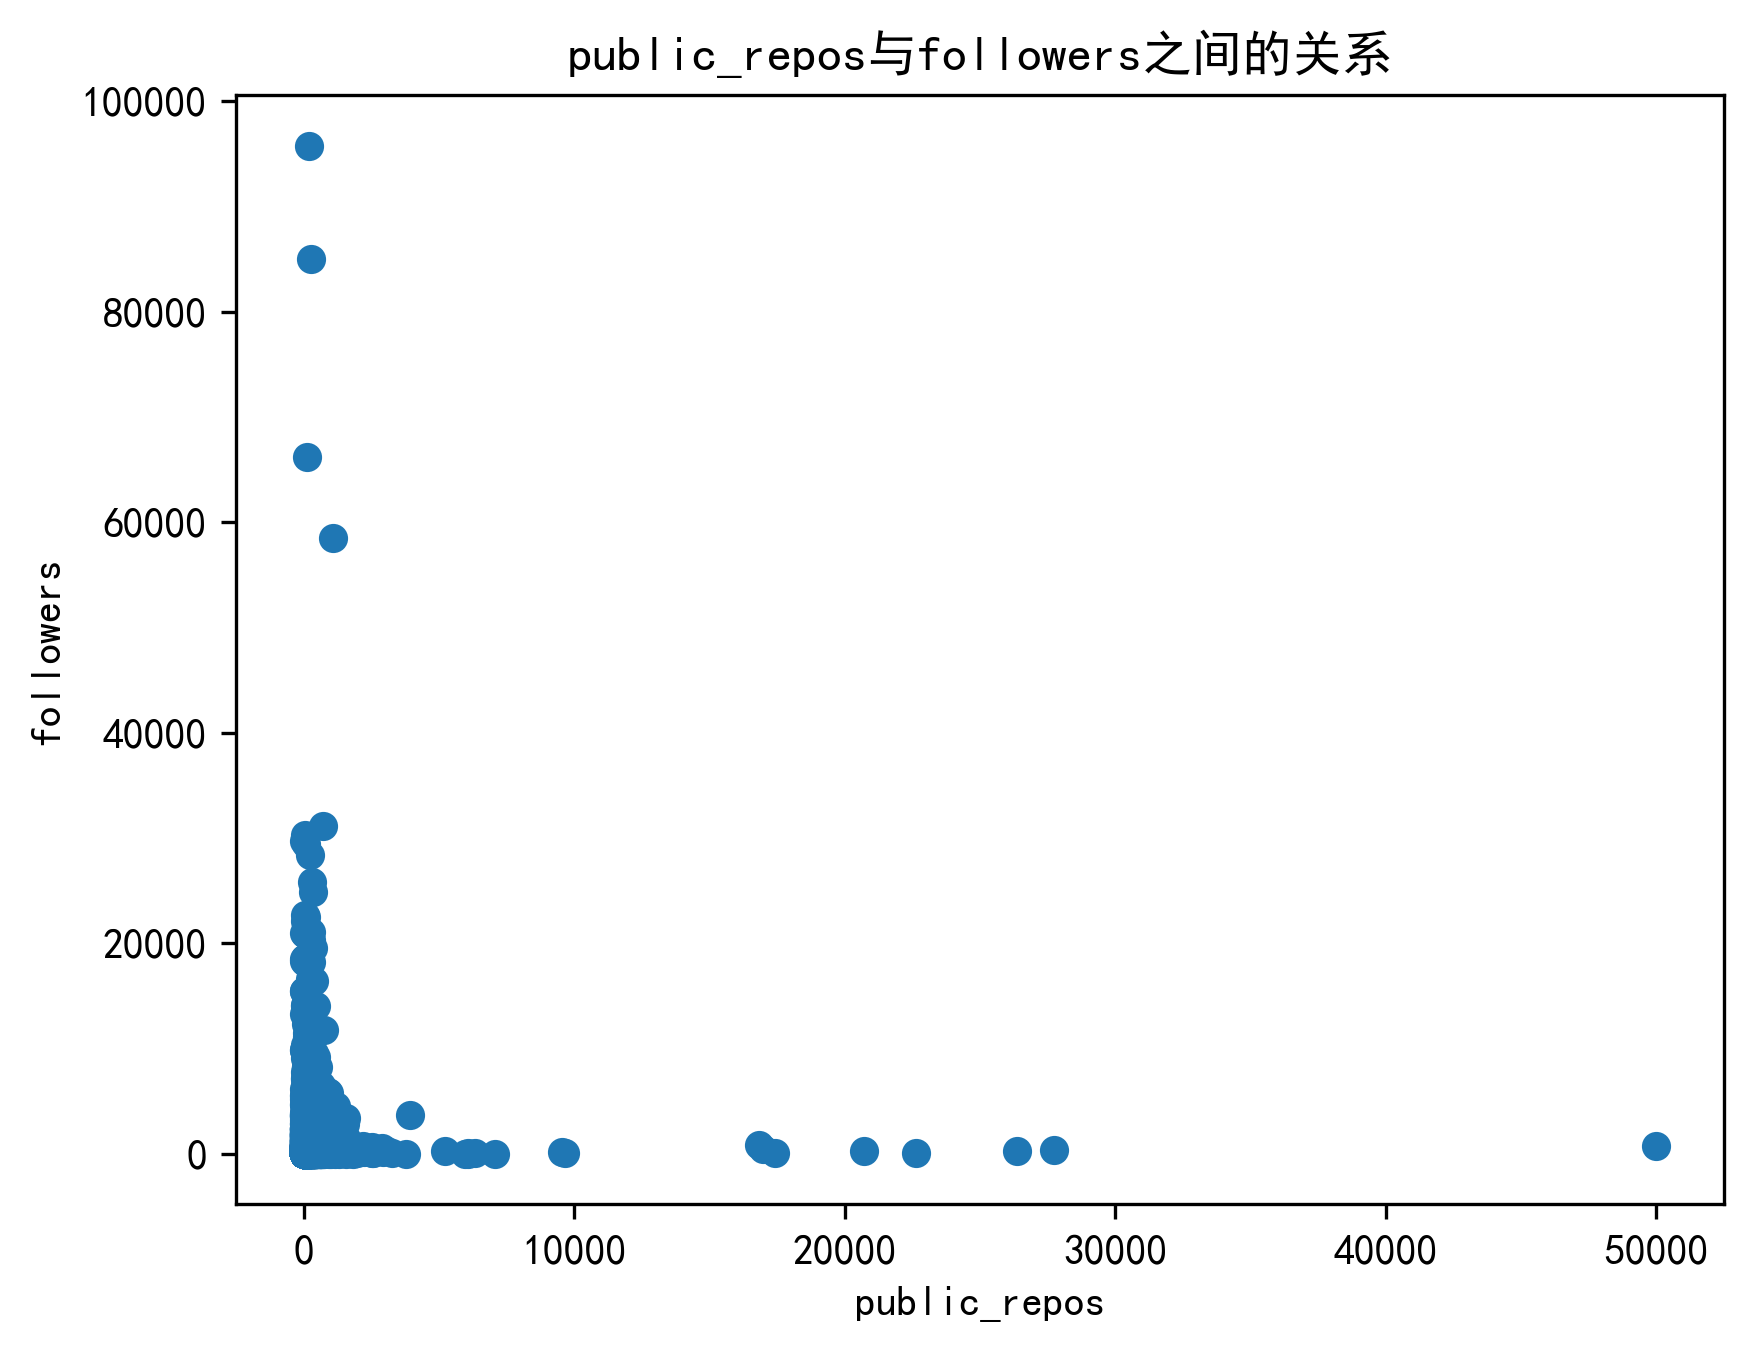

In [28]:
# 绘制散点图：展示public_repos与followers之间的关系。
import pandas as pd
import matplotlib.pyplot as plt

# 提取public_repos和followers列的数据
public_repos = df['public_repos']
followers = df['followers']

# 使用Matplotlib绘制散点图
plt.scatter(public_repos, followers)

# 设置图表标题和轴标签
plt.title('public_repos与followers之间的关系')
plt.xlabel('public_repos')
plt.ylabel('followers')

# 显示图表
plt.show()

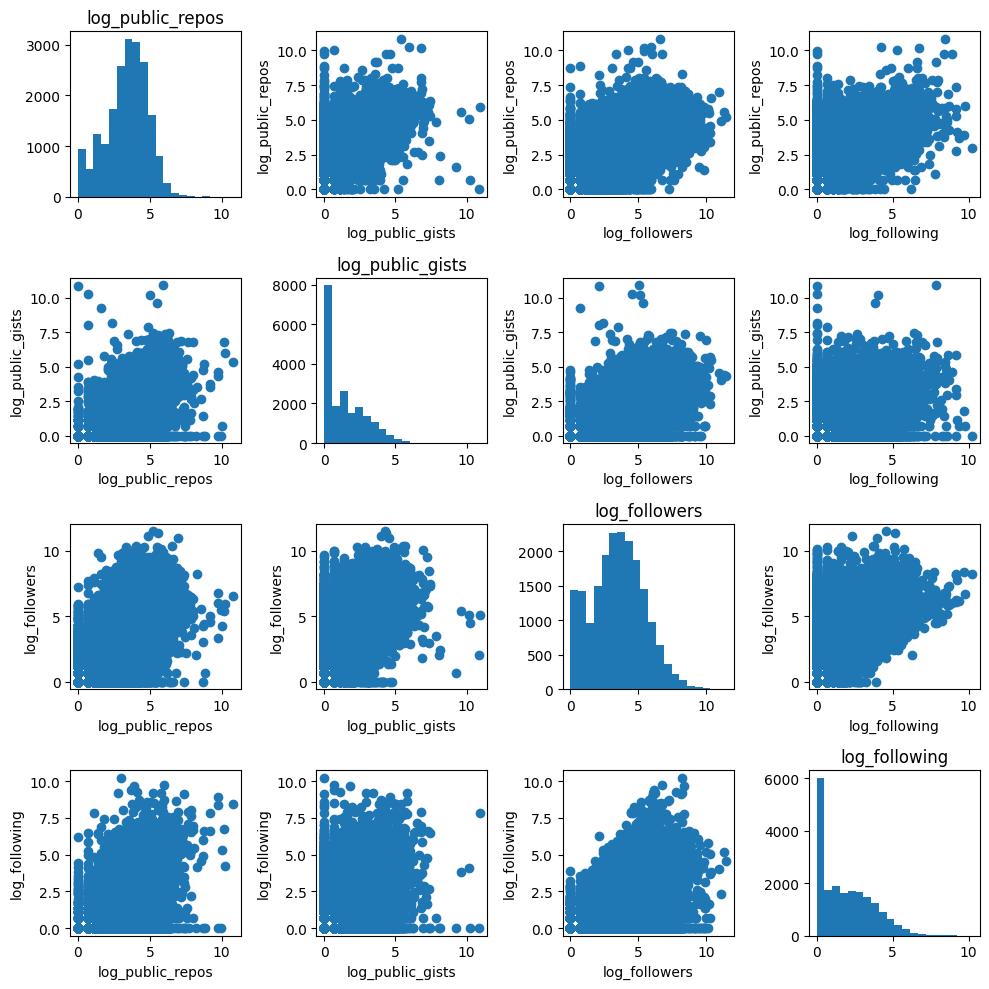

In [3]:
# 绘制散点矩阵：展示多个数值型特征之间的成对关系。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('github_bot_processed_data.csv')

log_columns = ['public_repos', 'public_gists', 'followers', 'following']
for column in log_columns:
    df[f'log_{column}'] = np.log1p(df[column])

data = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].copy()

# 创建散点矩阵
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

# 遍历每一个子图
for i in range(4):
    for j in range(4):
        if i == j:
            # 在对角线上绘制直方图来展示单个变量的分布
            axes[i, j].hist(data.iloc[:, i].dropna(), bins=20)
            axes[i, j].set_title(data.columns[i])
        else:
            # 在非对角线上绘制散点图展示变量之间的成对关系
            axes[i, j].scatter(data.iloc[:, j], data.iloc[:, i])
            axes[i, j].set_xlabel(data.columns[j])
            axes[i, j].set_ylabel(data.columns[i])

# 调整子图之间的间距，让布局更合理
plt.tight_layout()
# 显示图形
plt.show()

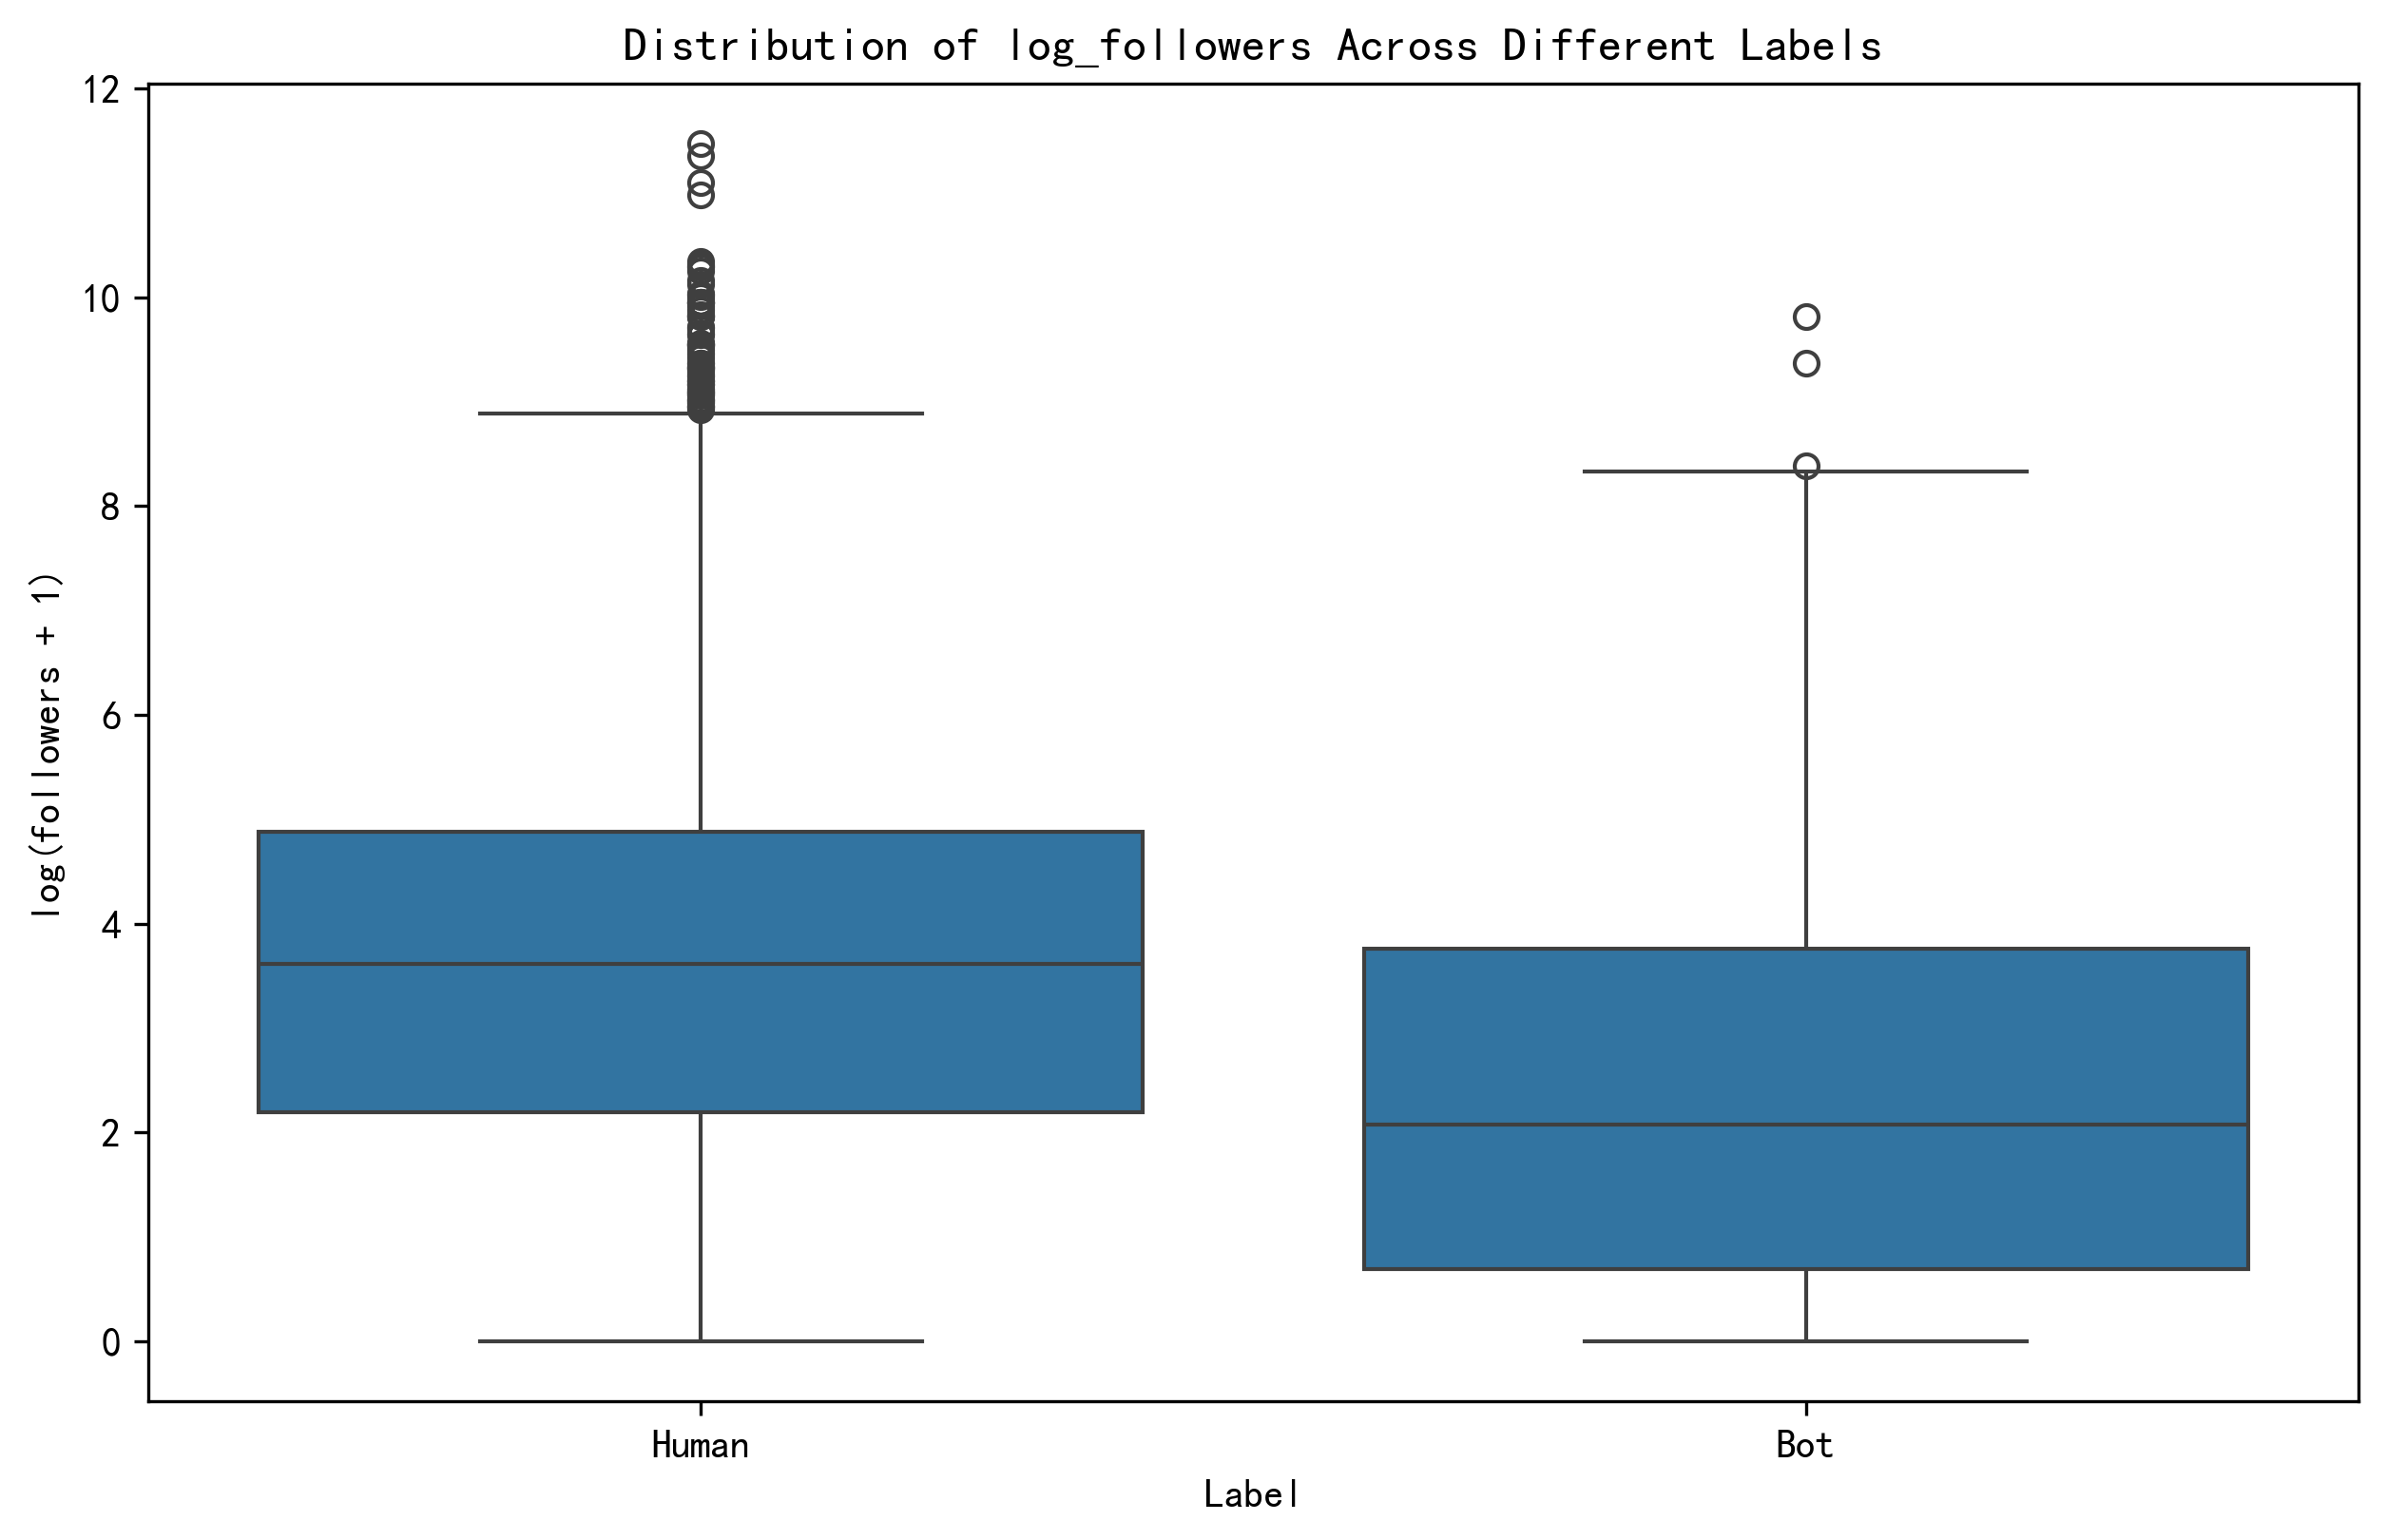

In [34]:
# 绘制箱线图：展示不同label类别下log_followers的分布。
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['log_followers'] = np.log1p(df['followers'])

# 使用Seaborn的boxplot函数绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=df)

# 设置图表标题和轴标签
plt.title('Distribution of log_followers Across Different Labels')
plt.xlabel('Label')
plt.ylabel('log(followers + 1)')

# 展示图表
plt.show()

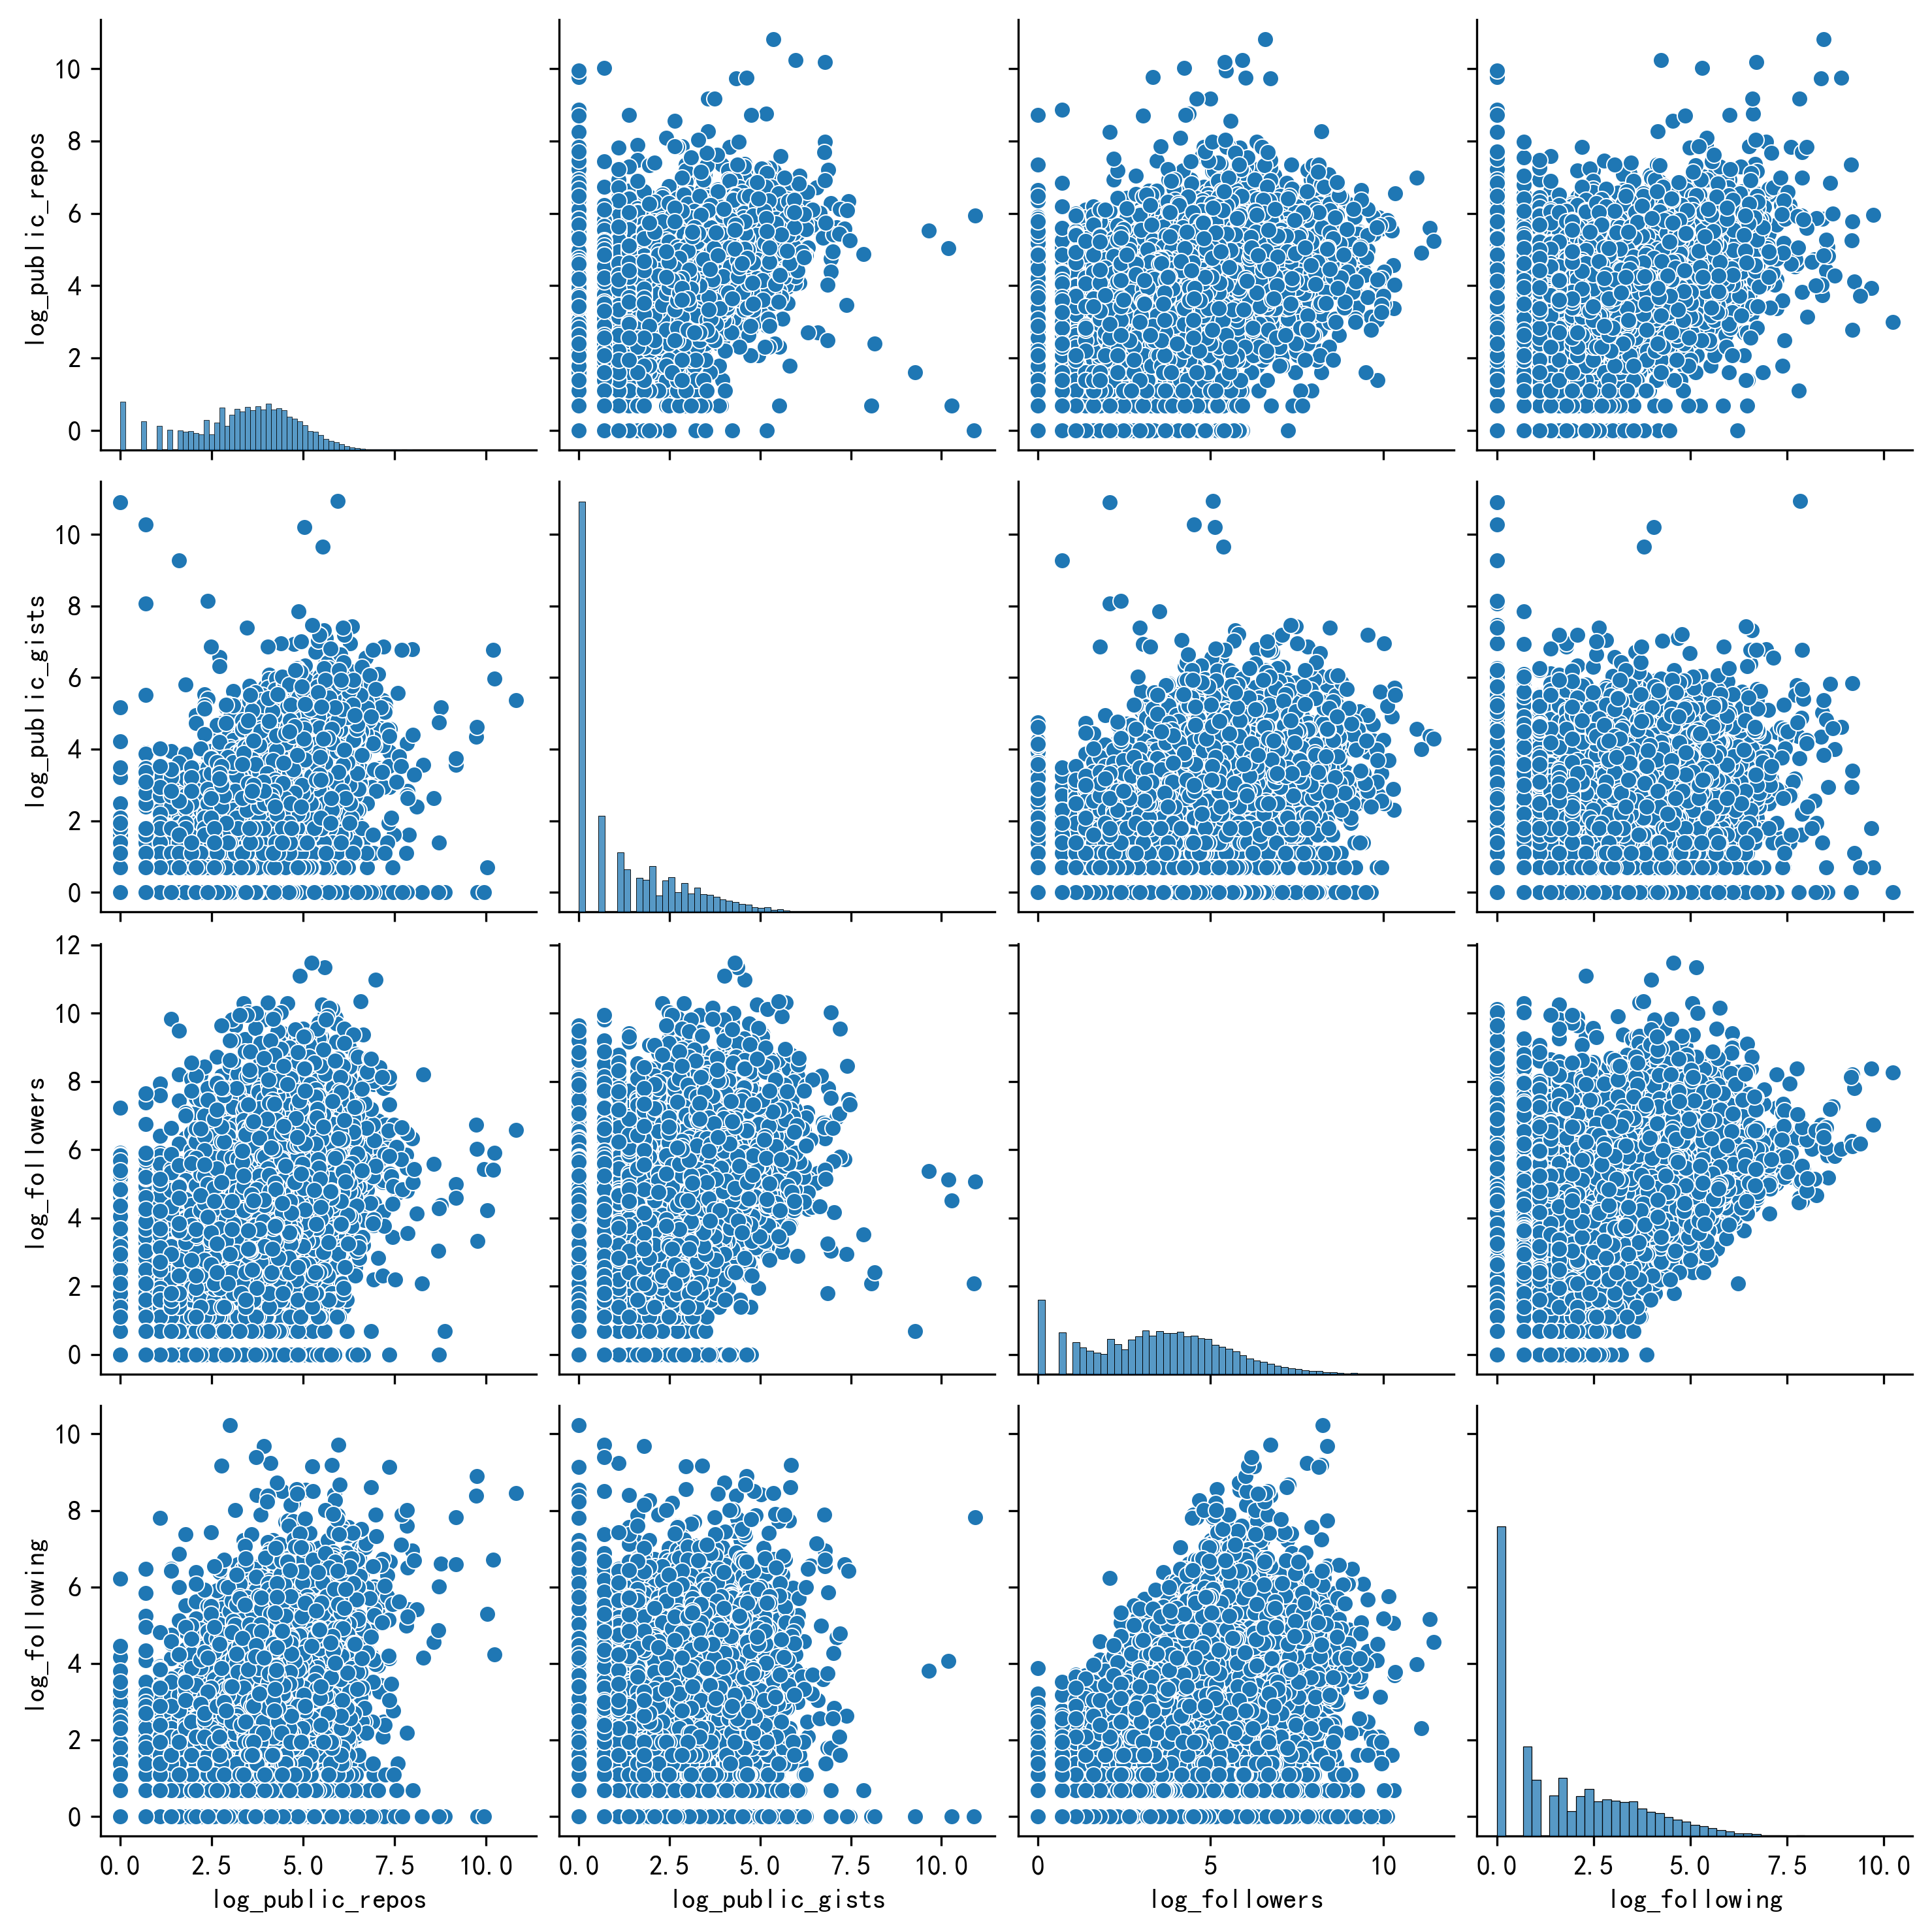

In [33]:
# 绘制成对图：展示不同特征之间的成对关系，并根据label分类
sns.pairplot(df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']])
plt.show()

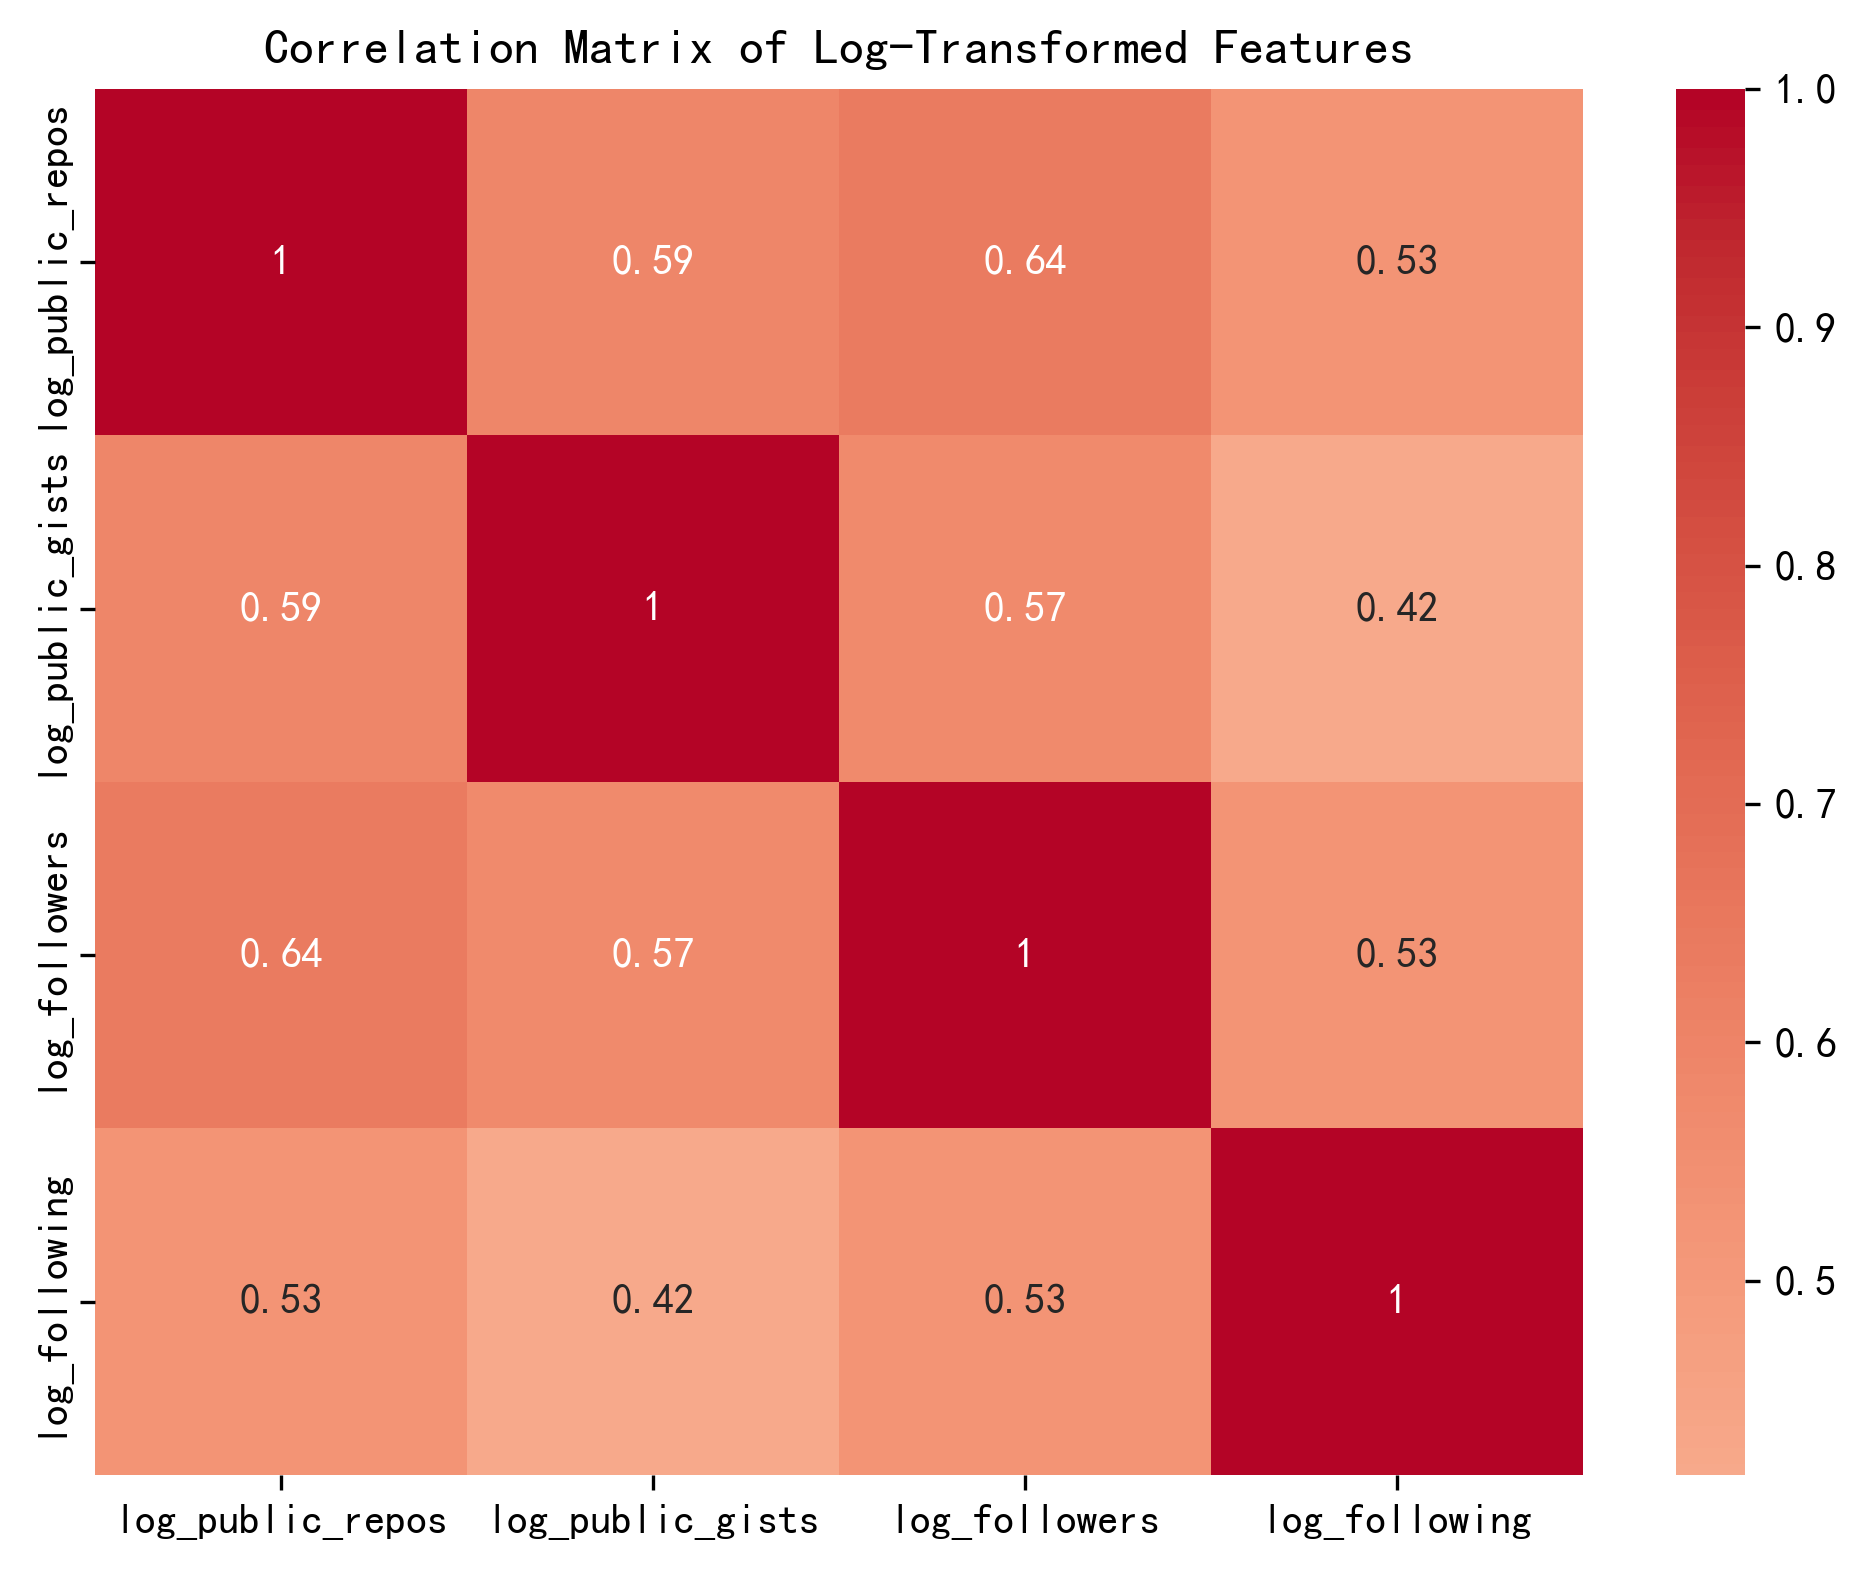

In [35]:
# 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 计算这些对数变换后的特征之间的相关系数矩阵
correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()

# 使用Seaborn的heatmap函数绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# 设置图表标题和轴标签
plt.title('Correlation Matrix of Log-Transformed Features')

# 展示图表
plt.show()

C:\Users\刘玥萌\AppData\Local\Temp\ipykernel_12136\458582802.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='log_followers', data=df, palette='viridis')


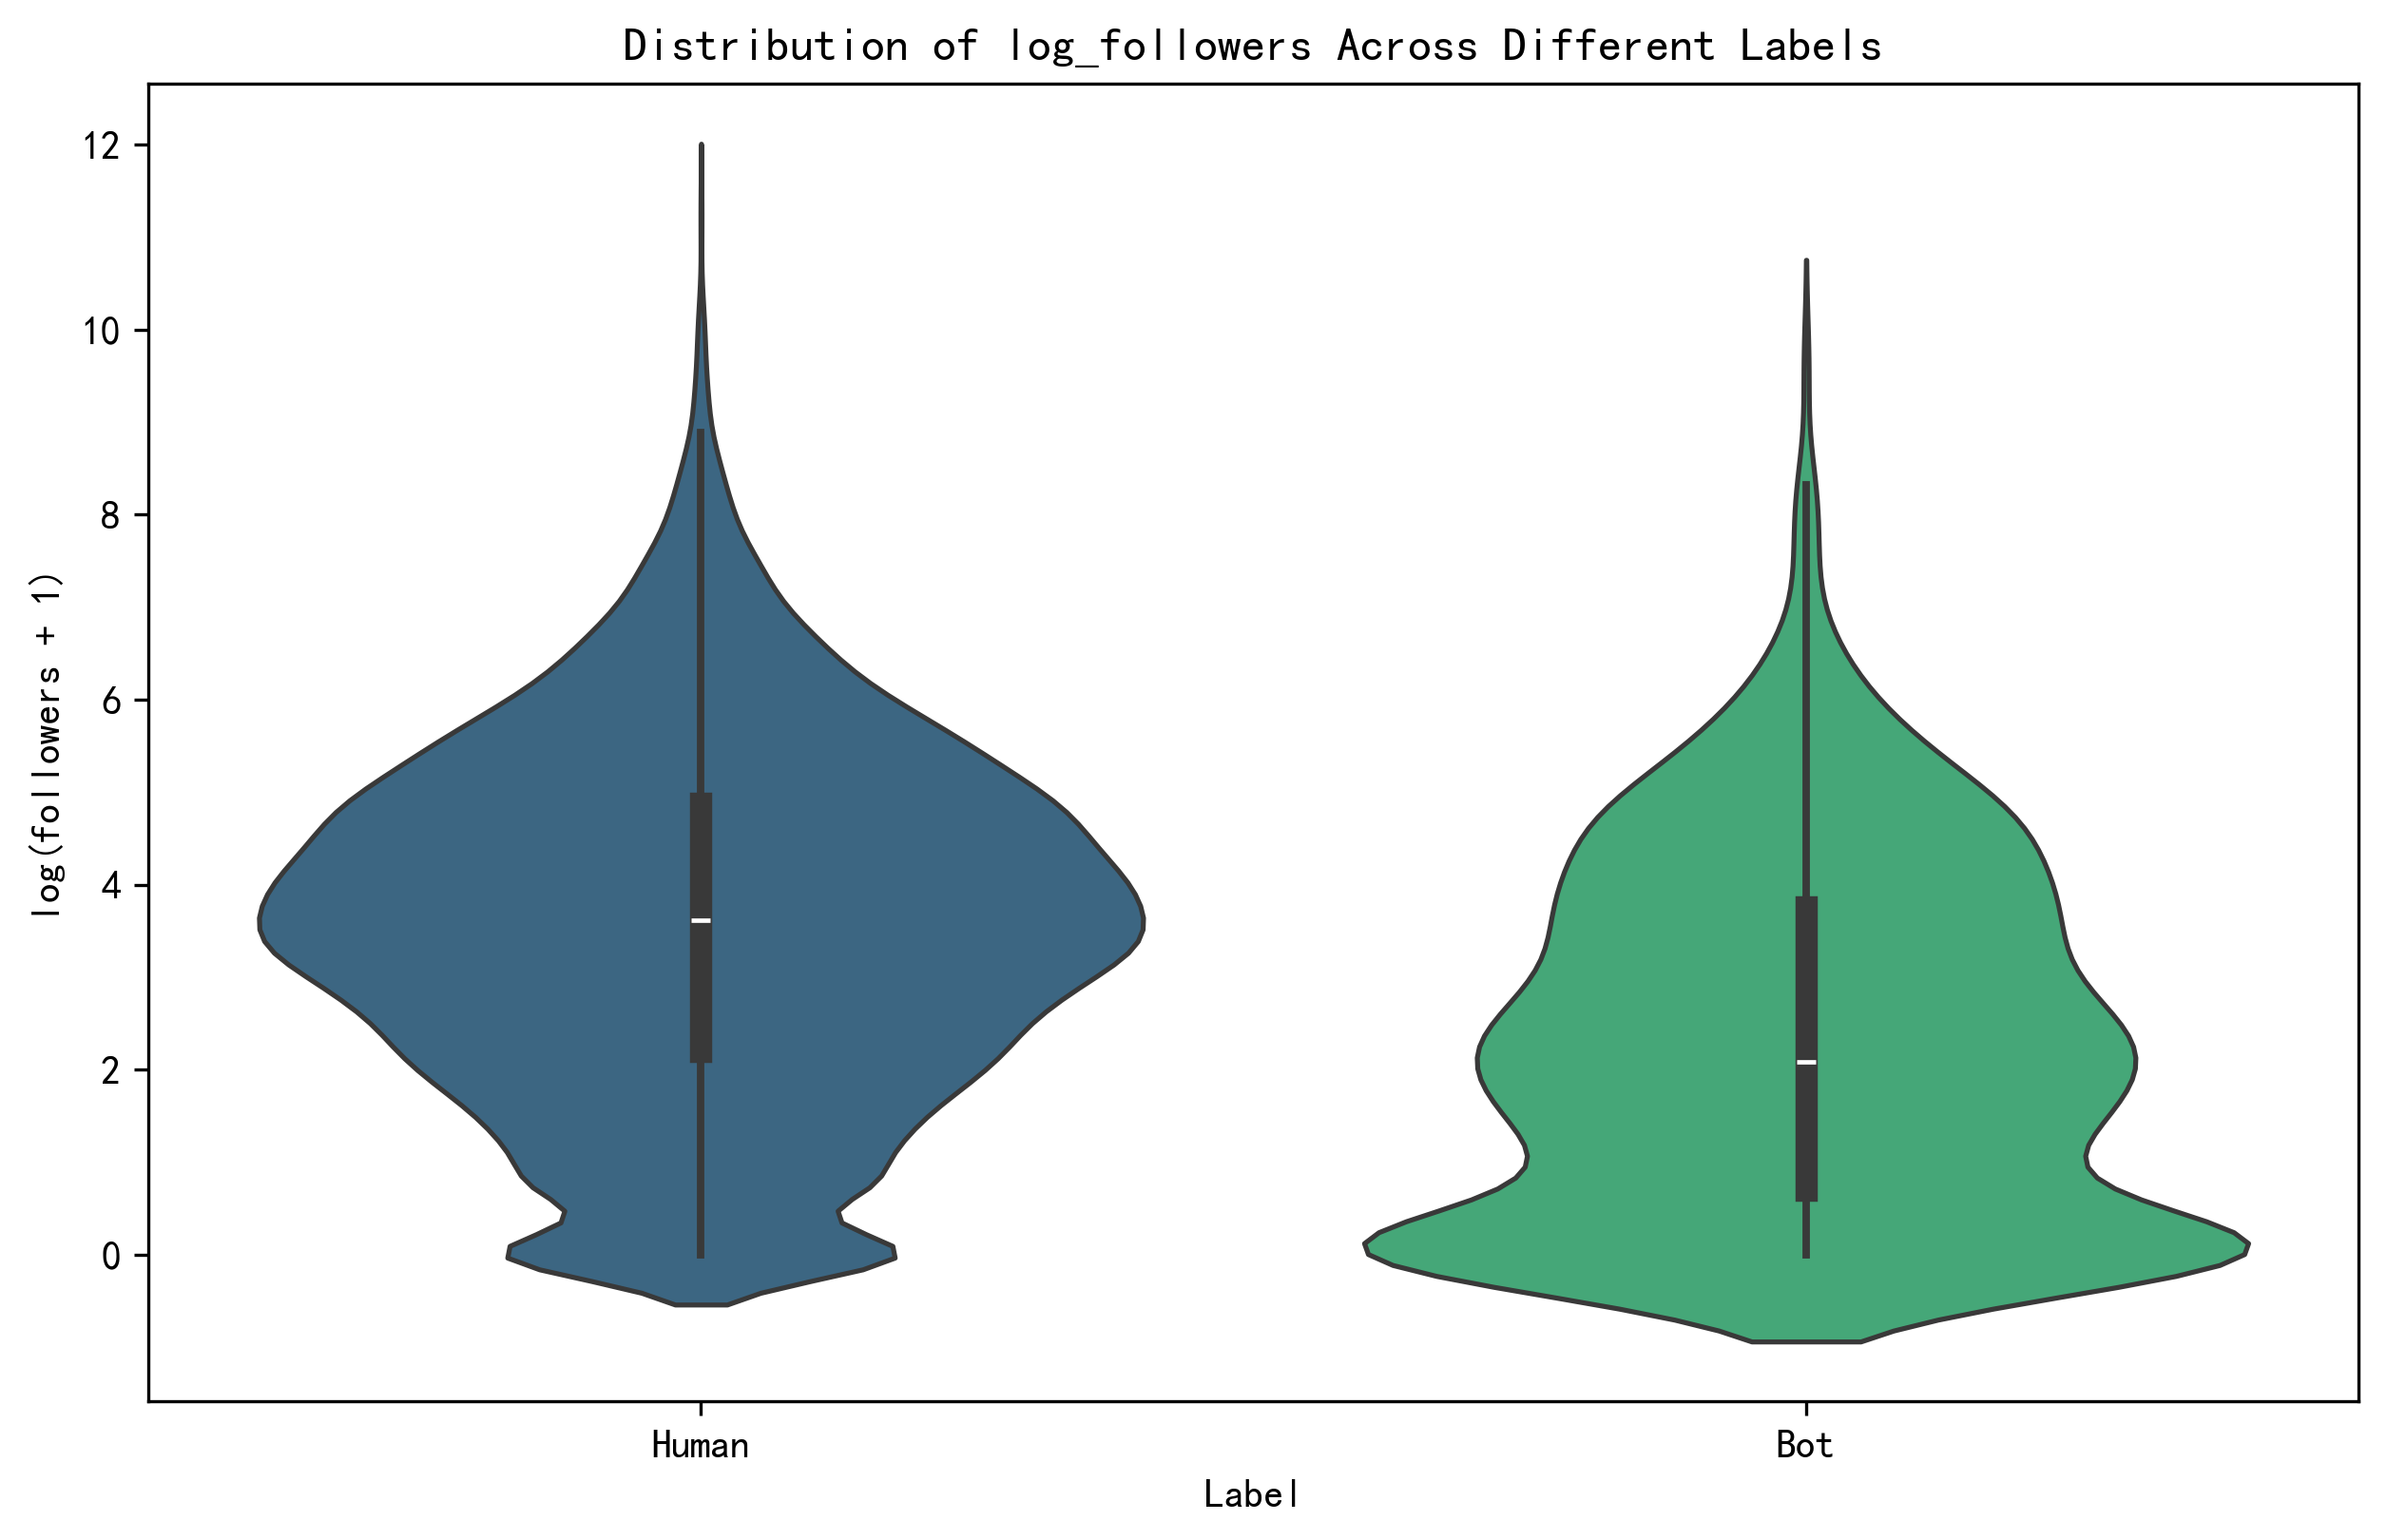

In [36]:
# 绘制小提琴图：展示label与log_followers之间的分布差异。
df['log_followers'] = np.log1p(df['followers'])

# x参数设定分类依据（此处为'label'列），y参数指定数据值（此处为'log_followers'列）
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=df, palette='viridis')

# 设置图表标题和轴标签
plt.title('Distribution of log_followers Across Different Labels')
plt.xlabel('Label')
plt.ylabel('log(followers + 1)')

# 展示图表
plt.show()

In [4]:
# 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。
import pandas as pd
from ydata_profiling import ProfileReport

# 读取文件
df = pd.read_csv('github_bot_processed_data.csv')

profile = ProfileReport(df, title="报告", explorative=True)
profile

# 报告在单独的一个网站中，这个网站的html文件已经上传到仓库的syo文件夹中了
profile.to_file("my_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]